In [2]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

# Ex.2.5

Error:  1.0361336312269427


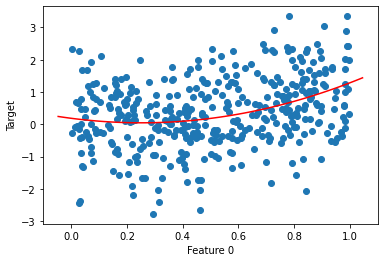

In [2]:
samples = 400
x = np.random.uniform(low=0,high=1,size=(samples,1))
e = np.random.normal(0, 1, size=(samples,1))
y = x**2 + e
a = pr.gendatr(x,y)
w = pr.linearr(a, 2)
pr.scatterr(a)
pr.plotr(w, color='red')
b = w.eval(a)
e = pr.testr(b)
print('Error: ', e)

# Ex. 2.4 

In [37]:
x = np.array([[-2,-1,0,3]]).transpose()
y = np.array([[1,1,2,3]]).transpose()
np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), np.matmul(x.transpose(), y))

array([[0.42857143]])

In [36]:
x = np.array([[-2,-1,0,3], [1,1,1,1]]).transpose()
y = np.array([[1,1,2,3]]).transpose()
np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), np.matmul(x.transpose(), y))

array([[0.42857143],
       [1.75      ]])

# Ex.2.7

Error:  63.558001164918785


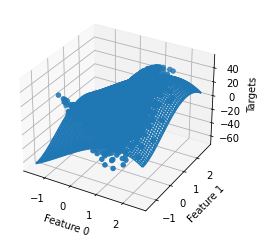

In [6]:
samples=10000
x = np.random.normal(0.5, 0.5, size=(samples,2))
y = np.array(50*np.sin(x[:,0])*np.sin(x[:,1]), ndmin=2).T
e = np.random.normal(0.5, 0.5, size=(samples,1))
y = y + e
a = pr.gendatr(x,y)
w = pr.linearr(a, 4)
pr.scatterr(a)
pr.plotr(w, color='red')
b = w.eval(a)
e = pr.testr(b)
print('Error: ', e)

Error always stays 1.0. This is because `linearr` doesn't include x1.x2 or x2.x3 etc terms. Only higher order individual terms. Whereas true y = 50sin(x1)sin(x2) + e

# Ex.2.15

In [3]:
dataset = pr.gendats([20,20],2,6)
x = +dataset
y = dataset.targets
x_n = np.append(x, np.ones([len(x),1]),1)
n, m = x_n.shape # n inputs and m dimensions
weights = np.random.randn(m, y.shape[1])

In [4]:
def perceptron_trainer(W, inp, y, bias=1, alpha=.01, rounds=10):
    for i in range(rounds):
        n, m = inp.shape
        activation = inp @ W # + bias # activation
        y_hat = np.where(activation > .0, 1., 0.)
        
        update = alpha * (y - y_hat) * inp
        for u in update:
            W += u[:, None]
    
    return {'w': W, 'b': bias} 

In [5]:
params = perceptron_trainer(weights, x_n, y)
w = params['w']
b = params['b']

In [7]:
print(w, '\n', b)

[[ 1.22533142]
 [ 2.20957695]
 [-2.37500867]] 
 1


In [43]:
y_cap = [np.dot(np.array(w).T,x_n[i])[0] for i in range(len(x_n))]
accuracy = (np.array(np.sign(y_cap) == np.sign(y)).diagonal()).sum() / len(y) * 100
print('Accuracy of Perceptron Classifier:', '\t', accuracy)

Accuracy of Perceptron Classifier: 	 97.5
